<a href="https://colab.research.google.com/github/Evertonsousa3/Academic-Works/blob/main/Introdu%C3%A7%C3%A3o_a_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações necessárias



In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
#Biblioteca para gerar valores aleatórios
import random
#Biblioteca para computação evolutiva
from deap import algorithms, base, creator, tools
#Biblioteca para funções matemáticas
import math
#Biblioteca para visualização gráfica
import matplotlib.pyplot as plt
#Biblioteca para operações matemáticas em matrizes
import numpy as np

# Função para gerar grafos aleatórios

In [ ]:
def geraGrafo(numVertices, limiteX, limiteY):
  vertices = []
  for i in range(numVertices):
    x = random.randint(limiteX[0], limiteX[1])
    y = random.randint(limiteY[0], limiteY[1])
    vertices.append((x, y))

  arestas = []
  for vertice1 in range(numVertices):
    numArestas = random.randint(1, numVertices-1)
    while True:
      vertice2 = random.randint(0, numVertices-1)
      if vertice1 < vertice2:
        if (vertice1, vertice2) not in arestas:
          arestas.append((vertice1, vertice2))
        numArestas -= 1
      elif vertice2 < vertice1:
        if (vertice2, vertice1) not in arestas:
          arestas.append((vertice2, vertice1))
        numArestas -= 1
      if numArestas == 0:
        break

  return vertices, arestas

# Função para exibir o grafo

In [ ]:
def imprimeGrafo(eixos, vertices, arestas, cobertura=None):
  plt.axis(eixos)

  for aresta in arestas:
    vertice1 = vertices[aresta[0]]
    vertice2 = vertices[aresta[1]]
    plt.plot([vertice1[0], vertice2[0]], [vertice1[1], vertice2[1]],'k-')

  numVertices = len(vertices)
  for i in range(numVertices):
    vertice = vertices[i]
    if cobertura == None:
      plt.plot(vertice[0], vertice[1], 'bo', markersize=8)
    elif cobertura[i] == 0:
      plt.plot(vertice[0], vertice[1], 'go', markersize=8)
    else:
      plt.plot(vertice[0], vertice[1], 'ro', markersize=12)

  plt.show()

##Têmpera Simulada

###Função para gerar uma cobertura inicial aleatória

In [ ]:
def cobertura_inicial(numVertices):
  return [random.randint(0, numVertices - 1)
  for c in range(numVertices)]

###Função para calcular o custo

In [ ]:
def calcula_custo(cobertura, numVertices):
  custo = 0
  for c in range (numVertices):
    for i in range(c+1, numVertices):
      if cobertura[c] == cobertura[i]:
        custo += 1
  return custo

###Função para aplicação da tempora simulada

In [ ]:
def recozimento(numVertices, vertices, arestas):
    numVertices = len(vertices)
    temperatura_inicial = 90
    temperatura_final = 0.1

    cobertura_atual = [random.randint(0, 1) for c in range(numVertices)]
    melhor_custo = calcula_custo(cobertura_atual, numVertices)

    alpha = 0.01
    interacoes = 0

    temperatura = temperatura_inicial
    while temperatura > temperatura_final:
        nova_solucao = [random.randint(0, 1) for c in range(numVertices)]
        novo_custo = calcula_custo(nova_solucao, numVertices)
        delta = novo_custo - melhor_custo

        if delta > 0:
            cobertura_atual = nova_solucao
            melhor_custo = novo_custo
        else:
            if random.random() < math.exp(-delta / temperatura):
                cobertura_atual = nova_solucao
                melhor_custo = novo_custo

        temperatura *= alpha
    return cobertura_atual, melhor_custo

##Algoritmos genéticos

###Função de aptidão

In [ ]:
def calcula_aptidao(cobertura):
  return len(set(cobertura)),

###Função para utilizar algoritmos genéticos

In [ ]:
def algoritmos_geneticos(numVertices, vertices):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_int", random.randint, 0, numVertices - 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, len(vertices))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", calcula_aptidao)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    populacao = toolbox.population(n=tamanho_populacao)

    numero_geracoes = 100 #proposto no vertex_cover
    tamanho_populacao = 100 #proposto no vertex_cover

    for geracao in range(numero_geracoes):
      filhos = algorithms.varAnd(populacao, toolbox, cxpb=0.9, mutpb=0.1)

      fits = list(map(toolbox.evaluate, filhos))

      for ind, fit in zip(filhos, fits):
        ind.fitness.values = fit

      populacao = filhos

    melhor_individuo = tools.selBest(populacao, k=1)[0]
    return melhor_individuo, len(set(melhor_individuo))

###Comapração das técnicas utilizadas

In [ ]:
def comparacao_tecnicas(numVertices):
  plt.plot(x, y, 'bo-')
  plt.xlabel('Número total de vértices')
  plt.ylabel('Número de vértices na cobertura')
  plt.xticks([numVertices])
  plt.title('Cobertura mínima de vértices')
  plt.legend(['Abordagem', 'Perturbação', 'Tempera simulada'])
  plt.grid(True)
  plt.show()

#Testes

###10 vértices

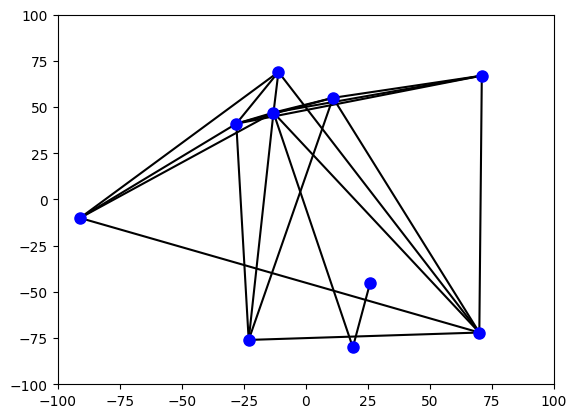

In [ ]:
x = []
y = []
(vertices, arestas) = geraGrafo(10, (-100,100), (-100,100))
imprimeGrafo([-100,100,-100,100], vertices, arestas)

###Visualização da aplicação de têmpera simulada

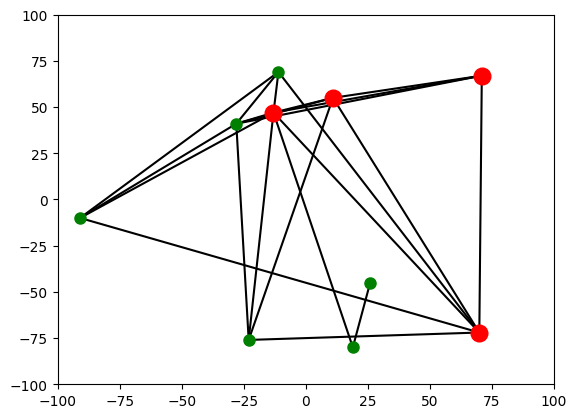

[21, 24, 36, 20, 24, 24, 21, 24, 21, 21]


In [ ]:
solucao_tempora_simulada, x = recozimento(10, vertices, arestas)
x_valores = []  # Crie uma lista vazia para armazenar os valores de x

for i in range(10):  # Por exemplo, se você deseja executar o loop 10 vezes
    solucao_tempora_simulada, x_atual = recozimento(10, vertices, arestas)
    x_valores.append(x_atual)  # Adicione o valor atual de x à lista x_valores

imprimeGrafo([-100, 100, -100, 100], vertices, arestas, solucao_tempora_simulada)
print (x_valores)

###Visualização da aplicação dos Algoritmos Genéticos

In [ ]:
(solucao_algoritmo_genetico, y) =